## 感知机导论

分出两类数据点可以有很多条线。那如何定义一条好的线呢？

- 如果我们把所有**分错的点**和直线的**距离求和**，让这段求和的**距离最小**，这条直线就是我们要找的。

对于划分感知机的线我们可以描述为：

1. 一条直线不分错一个点，这就是好的直线；
2. 模型要尽可能找到好的直线；
3. 如果没有好的直线，在差的直线中找到较好的直线；
4. 判断直线多差的方式：分错的点到直线的距离求和。

感知机模型的终极目标是学习一个函数$f(x)$:

$$
f(x) = sign(w · x + b)
$$

其中: 当$x \geq 0$的时候, $sign(x) = + 1$; 当$x \leq 0$的时候，$sign(x) = -1$。$w · x + b$是超平面。

## 感知机学习策略

正式来说$w · x + b$是一个$n$维空间的超平面$S$, 其中$w$是超平面的法向量，$b$是超平面的截距，这个超平面将特征空间划分成两部分，位于两部分的点分别被分为正负两类，所以，超平面$S$称为分离超平面。

$w$是超平面的法向量，$b$是超平面的截距，特征空间也就是整个$n$维空间，样本的每个属性都叫一个特征，**特征空间**的意思是在这个空间中可以找到样本所有的属性组合。

### 函数间隔




**函数间隔**定义为：

$$
y_{0}(w * x_{0} + b)
$$

为了能够使得确定该样本是正例还是反例的置信程度最大。当$y_{0}=1$的时候，我们希望$w * x_{0} + b$能够最大，反之则希望其最小。但是函数间隔会随着参数$w$和$b$的增大或缩小，等比例增大或缩小。

### 几何间隔




**几何间隔**定义为：

$$
d=\frac{\left|w \cdot x_{0}+b \right|}{\|w\|}
$$

其中$\|w\|_{2}=\sqrt{\sum_{i=1}^{N}w_{i}^{2}}$。所以当$w$或者$b$等比例放大的时候，放大的参数可以单独提出来然后消掉。

### 超平面的构造





## 感知机的学习算法



对于误分类数据而言, 有：

$$
-y_{i}(w · x_{i} + b) > 0
$$

误分类点$x_{i}$到超平面$S$的距离为：

$$
-\frac{1}{\|w\|}y_{i}(w · x_{i} + b)
$$

因此，所有误分类点到超平面$S$的总距离为：

$$
-\frac{1}{\|w\|} \sum_{x_{i} \in M}y_{i}(w · x_{i} + b)
$$

我们希望所有误分类点到超平面距离最小。可以采用梯度下降法极小化目标函数：

$$
L(w, b) = - \sum_{x_{i} \in M}y_{i}(w · x_{i} + b)
$$



### 原始形式



感知机是一个误分类驱动的算法，最后是期望没有一个误分类点，所以这里采用函数间隔也没有什么大问题，因为最终的结果只是期望没有分类错误的点。如果没有分类错误的点的话，目标函数就会失效，对于整个算法目标来说，就没有什么意义了。这一点也侧面反映了感知机只能在线性可分的数据集上达到比较好的效果。

对目标函数**求梯度**，我们有：

$$
\nabla_{w} L(w, b)=-\sum_{x_{i} \in M} y_{i} x_{i}
$$

$$
\nabla_{b} L(w, b)=-\sum_{x_{i} \in M} y_{i}
$$

最后依据梯度下降法我们可以更新参数$w$和$b$:

$$
\begin{aligned}
&w \leftarrow w+\eta y_{i} x_{i} \\
&b \leftarrow b+\eta y_{i}
\end{aligned}
$$

这里是减去一个负号，最终变成了加号。

### 对偶形式

感知机的原始形式中计算存在冗余，如果初始$w=0$，根据上方参数更新公式$w=w+\eta y_ix_i$，可以知道$w$其实是$\{y_1x_1,y_2x_2,...,y_Nx_N\}$的线性组合（$N$表示训练样本量），所以$w$可以表示为：  

$$
w=\sum_{i=1}^N\alpha_i y_ix_i
$$  

所以对于原始优化变量$w$的求解，改变为对优化变量$\alpha=[\alpha_1,\alpha_2,...,\alpha_N]^T$的求解；原来对于误分类点$(x_i,y_i)$的参数更新公式$w=w+\eta y_ix_i$可以换成：  

$$
\alpha_i=\alpha_i+\eta
$$  


### 算法收敛性



## 例子

### 问题描述

&emsp;&emsp;训练数据集中，正例点为$x_{1}=(3,3)^{T}$, $x_{2}=(4, 3)^{T}$, 负例点为$x_{3}=(1, 1)^{T}$。求解感知机模型$f(x)=sign(w · x + b)$, 其中$w = (w^{(1)}, w^{(2)})^{T}$, $x = (x^{(1)}, x^{(2)})^{T}$。

### 解

1. 构建损失函数

$$
min L(w, b) = - \sum_{x_{i} \in M} y_{i}(w · x_{i} + b)
$$

2. 梯度下降求解$w,b$。设步长$\eta$为1。

    1) 取初值$w_{0}=0, b_{0}=0$。
    
    2）对于$x_{1}$而言，$y_{1}(w_{0} · x_{1} + b_{0})$未被正确分类，更新$w,b$。

    此时：$w_{1}=w_{0} + x_{1}y_{1} = (3, 3)^{T}$, $b_{1}=b_{0} + y_{1}=1$，得到$w_{1}x + b_{1} = 3x^{(1)} + 3x^{(2)} + 1$。
    
    3） 对于$x_{1}, x_{2}$, 显然$y_{i}(w_{1}x_{i} + b_{1}) > 0$, 被正确分类，不作修改。对于$x_{3}$, $y_{3}(w_{1}x_{3} + b_{1}) < 0$, 被误分类，更新$w,b$。
    此时：$w_{2}=w_{1} + x_{3}y_{3} = (2, 2)^{T}$, $b_{2}=b_{1} + y_{3}=0$，得到$w_{2}x + b_{2} = 2x^{(1)} + 2x^{(2)} $。

## 代码实战

In [1]:
import numpy as np
import os
os.chdir('../')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Perceptron(object):
    def __init__(self, epochs=10, eta=None):
        self.w = None
        self.epochs = epochs
        self.eta = eta

    def init_params(self, n_features):
        """
        初始化参数
        :return:
        """
        self.w = np.random.random(size=(n_features + 1, 1))

    def fit(self, x, y):
        """
        :param x: ndarray格式数据: m x n
        :param y: ndarray格式数据: m x 1
        :return:
        """
        # 设置学习率
        if self.eta is None:
            self.eta = max(1e-2, 1.0 / np.sqrt(x.shape[0]))
        y = y.reshape(-1, 1)
        y[y == 0] = -1  # 将标签为0的数据设置为-1。
        # 初始化参数w,b
        n_samples, n_features = x.shape
        self.init_params(n_features)
        x = np.c_[x, np.ones(shape=(n_samples, ))]
        x_y = np.c_[x, y]

        for _ in range(self.epochs):
            error_sum = 0
            np.random.shuffle(x_y)
            for index in range(0, n_samples):
                x_i = x_y[index, :-1]
                y_i = x_y[index, -1:]
                # 更新错分点的参数
                if (x_i.dot(self.w) * y_i)[0] < 0:
                    dw = (-x_i * y_i).reshape(-1, 1)
                    self.w = self.w - self.eta * dw
                    error_sum += 1
            if error_sum == 0:
                break

    def get_params(self):
        """
        输出原始的系数
        :return: w
        """

        return self.w

    def predict(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        n_samples = x.shape[0]
        x = np.c_[x, np.ones(shape=(n_samples,))]
        return (x.dot(self.w) > 0).astype(int)

    def predict_proba(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        n_samples = x.shape[0]
        x = np.c_[x, np.ones(shape=(n_samples,))]
        return utils.sigmoid(x.dot(self.w))

    def plot_decision_boundary(self, x, y):
        """
        绘制前两个维度的决策边界
        :param x:
        :param y:
        :return:
        """
        weights = self.get_params()
        w1 = weights[0][0]
        w2 = weights[1][0]
        bias = weights[-1][0]
        x1 = np.arange(np.min(x), np.max(x), 0.1)
        x2 = -w1 / w2 * x1 - bias / w2
        plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
        plt.plot(x1, x2, 'r')
        plt.show()

### 导入二分类数据集

In [3]:
from sklearn.datasets import make_classification
data,target=make_classification(n_samples=200, n_features=2,n_classes=2,n_informative=1,
                                n_redundant=0,n_repeated=0,n_clusters_per_class=1)

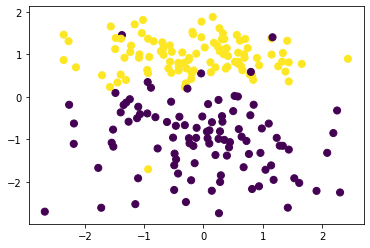

In [4]:
plt.scatter(data[:, 0], data[:, 1], c=target,s=50)

### 实例化模型, 拟合数据

In [5]:
perceptron = Perceptron()  # 训练模型
perceptron.fit(data, target)

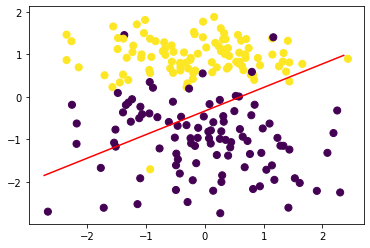

In [6]:
perceptron.plot_decision_boundary(data,target)

### 对偶方法求解问题

In [7]:
class Perceptron(object):
    def __init__(self, epochs=10, eta=None, mode=None):
        self.w = None
        self.epochs = epochs
        self.eta = eta
        self.mode = mode

    def init_params(self, n_features):
        """
        初始化参数
        :return:
        """
        self.w = np.random.random(size=(n_features + 1, 1))

    def _dual_fit(self, x, y, sample_weight):
        """
        模型训练的对偶形式
        :param x:
        :param y:
        :return:
        """
        y = y.reshape(-1, 1)
        y[y == 0] = -1

        n_samples, n_features = x.shape

        # 初始化参数
        self.alpha = np.zeros(shape=(n_samples, 1))

        x = np.c_[x, np.ones(shape=(n_samples,))]

        for _ in range(self.epochs):
            error_sum = 0
            indices = list(range(0, n_samples))
            np.random.shuffle(indices)
            for index in indices:
                x_i = x[index, :]
                y_i = y[index]
                # 更新错分点的参数，（注意需要有等号，因为初始化的alpha全为0）
                if (x_i.dot(x.T.dot(self.alpha * y)) * y_i)[0] <= 0:
                    self.alpha[index] += self.eta * sample_weight[index]
                    error_sum += 1
            if error_sum == 0:
                break
        # 更新回w
        self.w = x.T.dot(self.alpha * y)

    def fit(self, x, y, sample_weight=None):
        """
        :param x: ndarray格式数据: m x n
        :param y: ndarray格式数据: m x 1
        :param sample_weight: mx1,样本权重
        :return:
        """
        n_sample = x.shape[0]
        if sample_weight is None:
            sample_weight = np.asarray([1.0] * n_sample)
        else:
            sample_weight = sample_weight
        # check sample_weight
        if len(sample_weight) != n_sample:
            raise Exception('sample_weight size error:', len(sample_weight))
        # 设置学习率
        if self.eta is None:
            self.eta = max(1e-2, 1.0 / np.sqrt(x.shape[0]))
        if self.mode == "dual":
            self._dual_fit(x, y, sample_weight)
            return
        y = y.reshape(-1, 1)
        y[y == 0] = -1
        # 初始化参数w,b
        n_samples, n_features = x.shape
        self.init_params(n_features)
        x = np.c_[x, np.ones(shape=(n_samples,))]
        x_y = np.c_[x, y]

        for _ in range(self.epochs):
            error_sum = 0
            np.random.shuffle(x_y)
            for index in range(0, n_samples):
                x_i = x_y[index, :-1]
                y_i = x_y[index, -1:]
                # 更新错分点的参数
                if (x_i.dot(self.w) * y_i)[0] < 0:
                    dw = (-x_i * y_i).reshape(-1, 1)
                    # 考虑sample_weight
                    dw = dw * sample_weight[index]
                    self.w = self.w - self.eta * dw
                    error_sum += 1
            if error_sum == 0:
                break

    def get_params(self):
        """
        输出原始的系数
        :return: w
        """

        return self.w

    def predict(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        return np.argmax(self.predict_proba(x), axis=1)

    def predict_proba(self, x):
        """
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        n_samples = x.shape[0]
        x = np.c_[x, np.ones(shape=(n_samples,))]
        return np.c_[1.0 - utils.sigmoid(x.dot(self.w)), utils.sigmoid(x.dot(self.w))]

    def plot_decision_boundary(self, x, y):
        """
        绘制前两个维度的决策边界
        :param x:
        :param y:
        :return:
        """
        weights = self.get_params()
        w1 = weights[0][0]
        w2 = weights[1][0]
        bias = weights[-1][0]
        x1 = np.arange(np.min(x), np.max(x), 0.1)
        x2 = -w1 / w2 * x1 - bias / w2
        plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
        plt.plot(x1, x2, 'r')
        plt.show()


In [8]:
perceptron = Perceptron(mode='dual')
perceptron.fit(data, target)

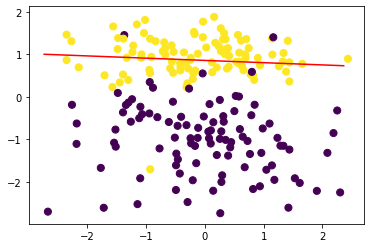

In [9]:
perceptron.plot_decision_boundary(data,target) # 可以发现结果几乎一致

对偶形式的模型参数数量与训练样本量相当,对于海量训练样本而言，这样的参数数量无法接受，而且训练会很慢，那我们进一步考虑一下，这些参数中真正发挥作用的有多少呢？

In [10]:
np.sum(perceptron.alpha!=0)/len(perceptron.alpha)

0.355

在所有训练样本中，真正能对模型提供帮助的其实仅占很少一部分，可以这样理解，当某个离决策超平面近的样本点满足某个条件时(大于0或者小于0)，和该样本点同侧且距离更远的样本自然也满足该条件，所以这些距离超平面远的点其实对模型没有帮助，所以我们只需要找到离决策超平面最近的几个样本点就可以将模型确定，这便是**支撑向量机(SVM)**的思想。

## 总结

1. 感知机通过构造超平面的形式划分不同类的点。
2. 感知机属于先行判别模型，因为它的判别边界是线性的。
3. 函数间隔和几何间隔的区别。